In [53]:
%%HTML
<style>
p {
    color: #343a40;
}

h1 a.anchor-link {
    color: #F7ECCB;
}

h1 {
    background-color: #343a40;
    width: fit-content;
    padding: 15px;
    color: white;
    text-align: center;
    width: 100%;
}

.intro {
    width: 60%;
    margin: auto;
    text-align: justify !important;
    font-family: Georgia;
}

.output_png {
    display: flex;
    align-items: center;
    justify-content: center;
}

.hide_btn {
    background-color: #343a40;
    padding: 15px;
    color: white;
    border-radius: 30px;
    border: none;
}
</style>

In [54]:
%%HTML
<script>
    code_show=true;
    function code_toggle() {
         if (code_show){
             $('div.input').hide();
         } else {
             $('div.input').show();
         }
         code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
    <input class='hide_btn' type="submit"
    value="Toggle code">
</form>

In [2]:
import os
os.environ['SKIMAGE_DATADIR'] = '/tmp/.skimage_cache'

In [67]:
from skimage.io import imread, imshow
from skimage.transform import downscale_local_mean
from skimage.color import rgb2gray, rgb2hsv, gray2rgb

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Chapter 1: His face in red, green, blue

<p class='intro'><br>Dear diary,<br>
It was a day like any other. Or at least I thought it was. Until I saw him. He was walking from across the room, and I had never seen him before. But there was something about him that enchanted me. I took a quick snap before he could notice, and quickly uploaded his photo onto my computer.</p>
<p class='intro'><i>I think it’s time for a closer look.</i></p>

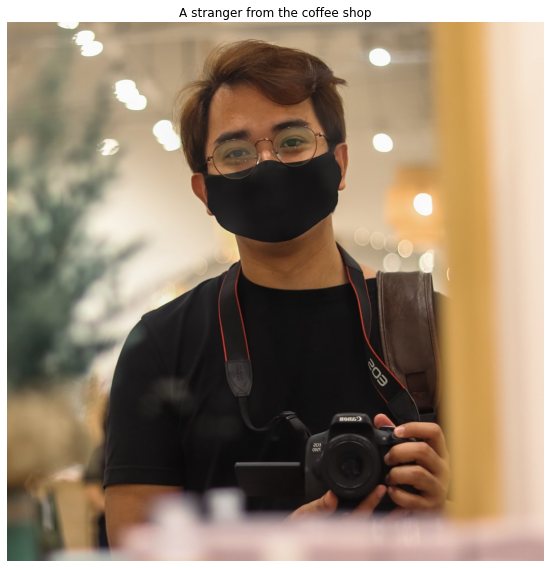

In [55]:
ch1 = imread('images/ch1.jpg')
plt.figure(figsize=(20, 8))
plt.axis('off')
plt.title('A stranger from the coffee shop')
plt.tight_layout()
plt.imshow(ch1);

Digital images are so convenient. I mean, gone were the days of holding poses for forever before getting a photo. All I needed was a second, to get this photo. Look at all those numbers. Those represent him, you know? I’ve never seen an array so beautiful.

In [58]:
ch1

array([[[174, 153, 124],
        [173, 152, 123],
        [172, 151, 122],
        ...,
        [248, 235, 219],
        [248, 235, 219],
        [248, 235, 219]],

       [[173, 152, 123],
        [172, 151, 122],
        [171, 150, 121],
        ...,
        [247, 234, 218],
        [247, 234, 218],
        [247, 234, 218]],

       [[171, 150, 121],
        [170, 149, 120],
        [169, 148, 119],
        ...,
        [247, 234, 218],
        [247, 234, 218],
        [247, 234, 218]],

       ...,

       [[ 58,  85,  70],
        [ 58,  85,  70],
        [ 59,  86,  71],
        ...,
        [197, 160, 152],
        [197, 160, 152],
        [198, 161, 153]],

       [[ 58,  85,  70],
        [ 59,  86,  71],
        [ 59,  86,  71],
        ...,
        [195, 158, 150],
        [196, 159, 151],
        [197, 160, 152]],

       [[ 58,  85,  70],
        [ 58,  85,  70],
        [ 59,  86,  71],
        ...,
        [194, 157, 149],
        [195, 158, 150],
        [196, 159, 151]]

Why don’t we sample this image too? Get the average of an area and set that as the value to downsample it. We can pretend that it’s him from faraway, see? Even blurry, he looks great, but these higher resolutions don’t really show much of a difference. I guess not everything can be noticed by the human eye. But I noticed him alright.

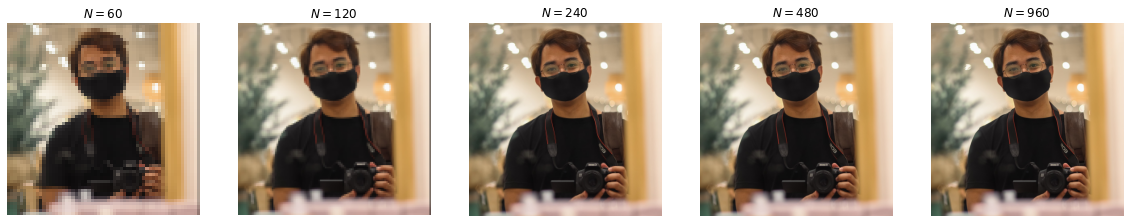

In [64]:
factors = 2**np.arange(0, 5)
fig, ax = plt.subplots(1, len(factors), figsize=(20, 8))
for i,factor in enumerate(factors):
    image = downscale_local_mean(ch1, 
                                 factors=(factor, factor, 1)).astype(int)
    ax_num = len(factors) - i - 1
    ax[ax_num].imshow(image)
    ax[ax_num].axis('off')
    ax[ax_num].set_title(r'$N=%d$' % image.shape[0])

Wow, this gaze is getting a little intense for me. Maybe we can adjust the intensity like this. . . quantize the values. . .

Quantization allows us to compress the intensity to just a few values.

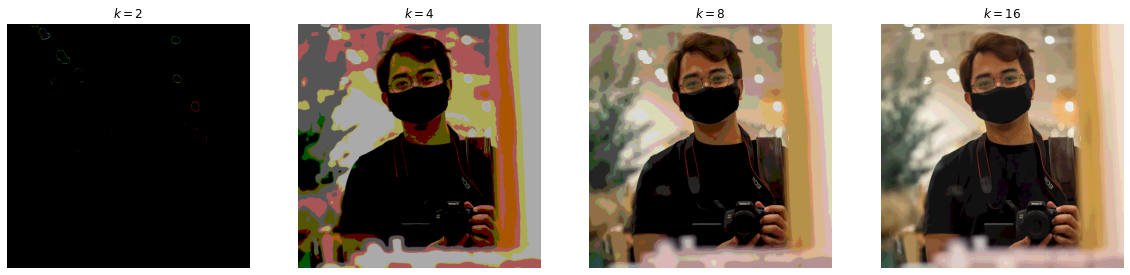

In [66]:
ks = 2**np.arange(1, 5)
fig, ax = plt.subplots(1, len(ks), figsize=(20, 5))
for i, k in enumerate(ks):
    bins = np.linspace(0, ch1.max(), k)
    image = np.digitize(ch1, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1).astype(int)
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title(r'$k = %d$' % k)

You know, he kind of looks like an old-timey, black-and-white movie star. I wonder what that would look like? Oh, I know! Let’s see him in grayscale and black-and-white. Thresholding the values should do the trick. Since a lot of this image is black, we need a lower threshold from the mean to actually see his features.

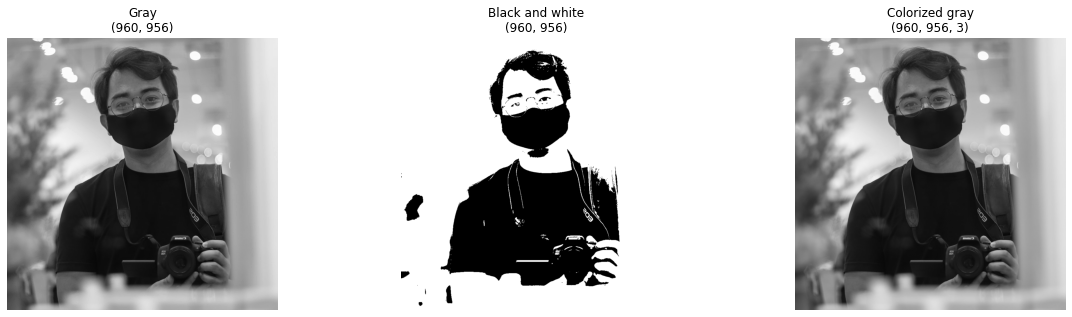

In [93]:
ch1_gray = rgb2gray(ch1)
ch1_bw = (ch1_gray > (ch1_gray.mean()/2))*1
ch1_graycolor = gray2rgb(ch1_gray)
imgs = [ch1_gray, ch1_bw, ch1_graycolor]
titles = ['Gray', 'Black and white', 'Colorized gray']

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(titles[i] + '\n' + str(imgs[i].shape))
    ax.axis('off')

Let’s play around with color here too. Digital images, especially colored ones, can be separated into three distinct channels representing their red, green, and blue values. The whiter parts indicate higher color values, and it makes sense to see a lot of white because he's wearing a lot of black, the color with highest value across channels for the RGB color space. I think red suits him the best, don’t you think?

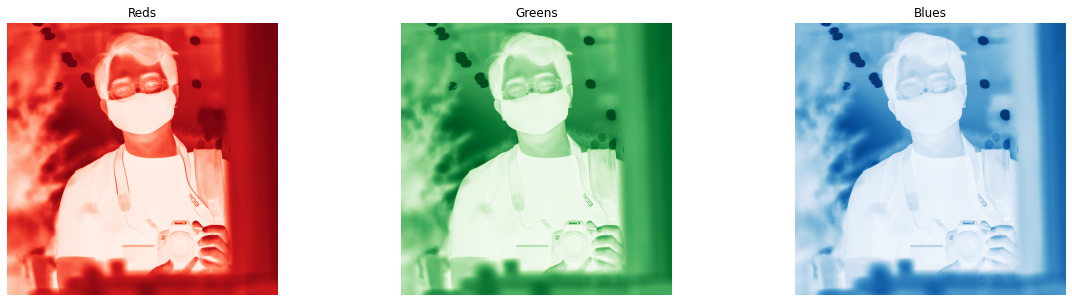

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
cmaps = ['Reds', 'Greens', 'Blues']

for i, ax in enumerate(axs):
    ax.imshow(ch1[:,:,i], cmap=cmaps[i])
    ax.set_title(cmaps[i])
    ax.axis('off')

A different way of representing images is the HSV color space too. It’s still three channels, but this time, it’s all about the hue, saturation, and value of the image. Hue saturate my mind with the value of you, stranger.

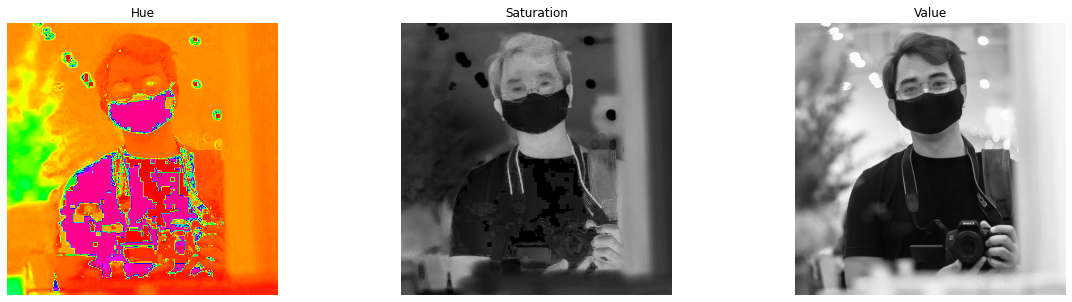

In [87]:
ch1_hsv = rgb2hsv(ch1)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
cmaps = ['hsv', 'gray', 'gray']
titles = ['Hue', 'Saturation', 'Value']

for i, ax in enumerate(axs):
    ax.imshow(ch1_hsv[:,:,i], cmap=cmaps[i])
    ax.set_title(titles[i])
    ax.axis('off')

<p class='intro'>Alright, enough playing around. We’ve become very well-acquainted with his face now. I’ve got to find him, and see him again soon. I wonder when that will be?</p>
<p class='intro'><i>See you next time. . . xoxo</i></p>